In [1]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the data
df = pd.read_csv('seattle-weather.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [6]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [7]:
df.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [8]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [9]:
df.isna().sum()


date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
# Min and max temperature records
print(df[df['temp_min'] == min(df.temp_min)])
print(df[df['temp_max'] == max(df.temp_max)])

           date  precipitation  temp_max  temp_min  wind weather
706  2013-12-07            0.0       0.0      -7.1   3.1     sun
           date  precipitation  temp_max  temp_min  wind weather
953  2014-08-11            0.5      35.6      17.8   2.6    rain


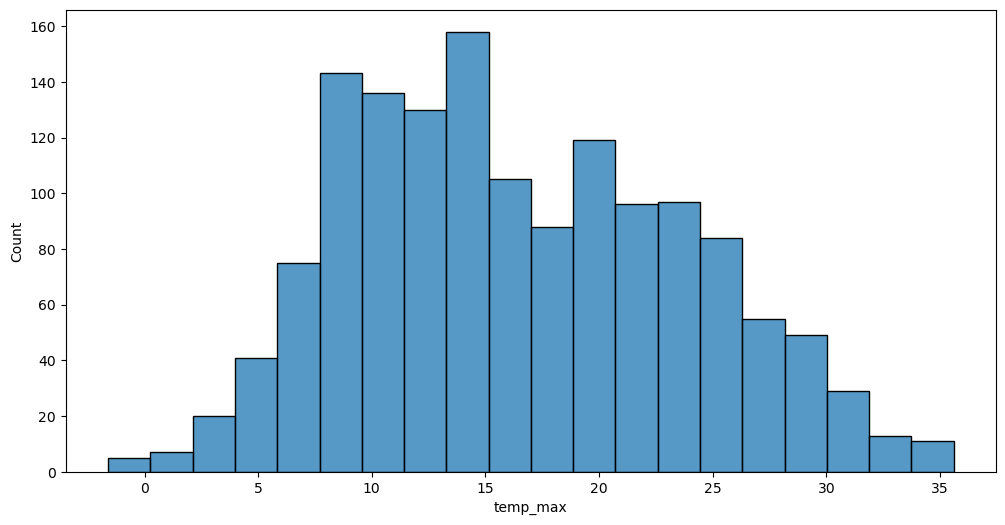

In [12]:
# Temperature distribution plots
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='temp_max', bins=20)
plt.show()

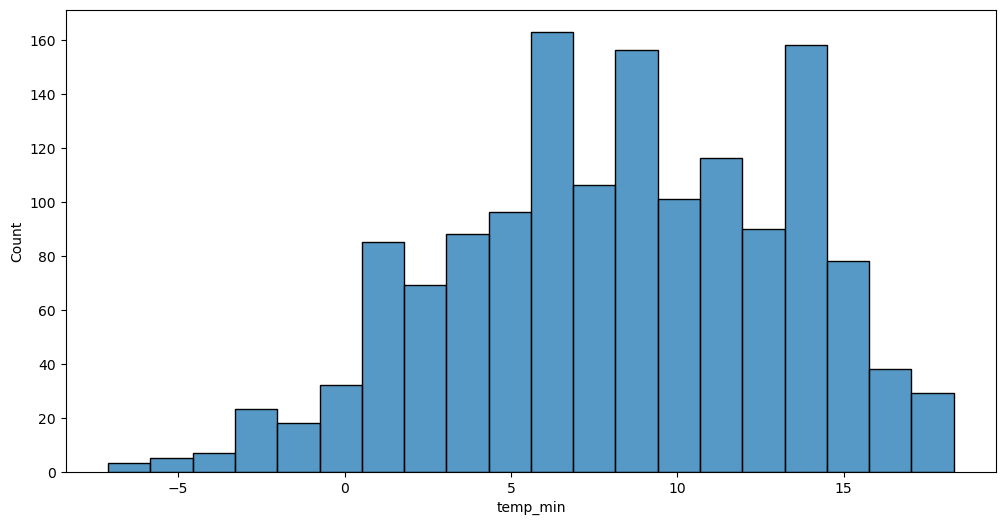

In [13]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='temp_min', bins=20)
plt.show()

In [14]:
# Adding date-related columns
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

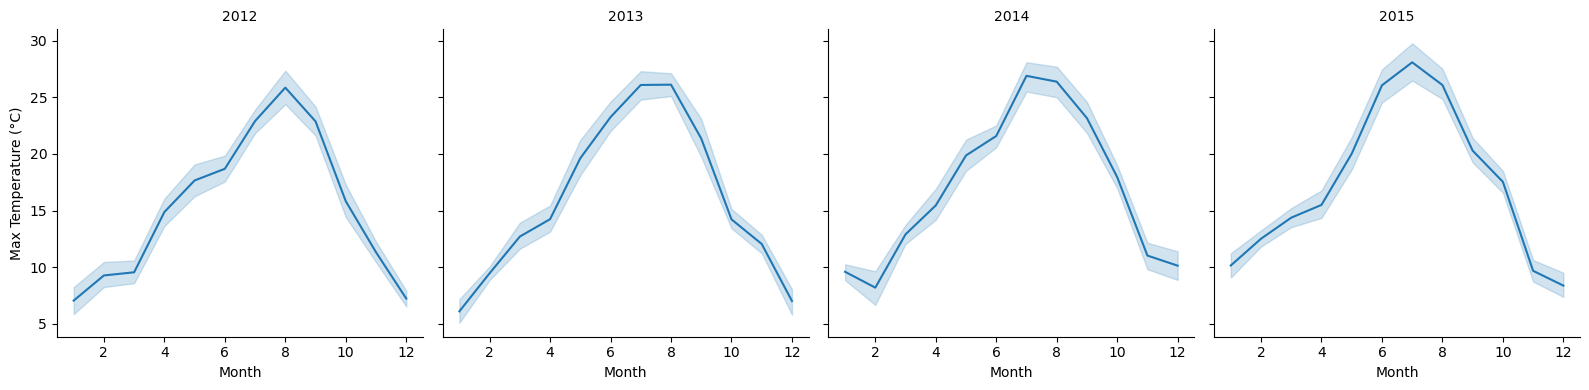

In [15]:
# FacetGrid plots for temperature and precipitation by year
g = sns.FacetGrid(df, col='year', col_wrap=4, height=4)
g.map(sns.lineplot, 'month', 'temp_max')
g.set_axis_labels('Month', 'Max Temperature (°C)')
g.set_titles(col_template="{col_name}")
plt.show()

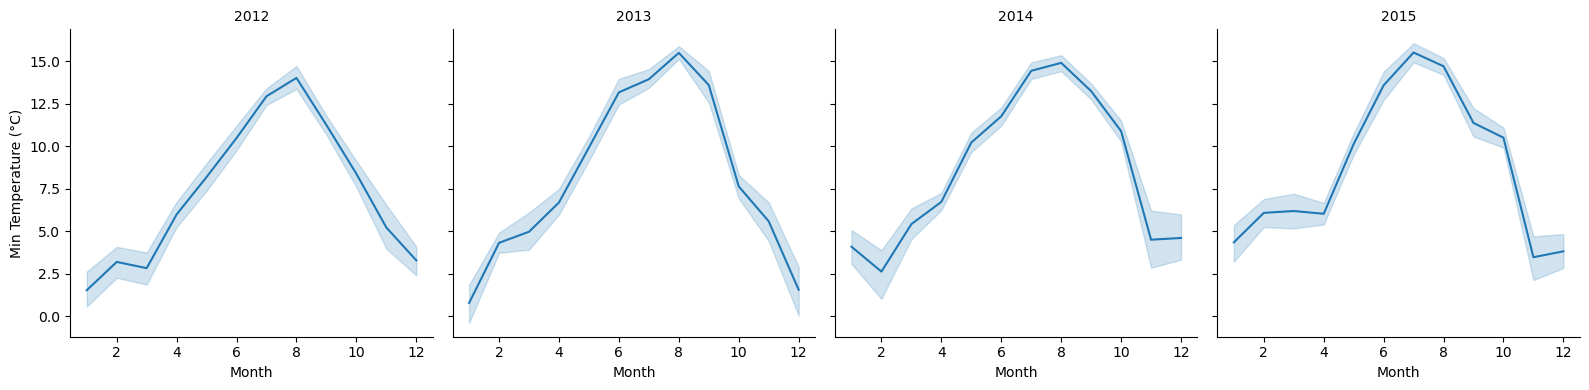

In [16]:
g = sns.FacetGrid(df, col='year', col_wrap=4, height=4)
g.map(sns.lineplot, 'month', 'temp_min')
g.set_axis_labels('Month', 'Min Temperature (°C)')
g.set_titles(col_template="{col_name}")
plt.show()

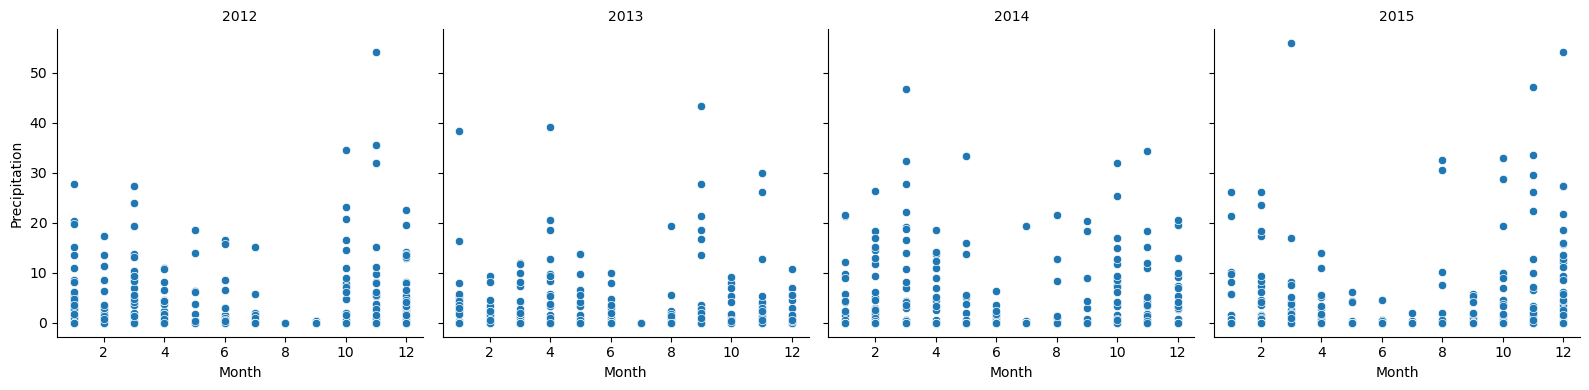

In [17]:
g = sns.FacetGrid(df, col='year', col_wrap=4, height=4)
g.map(sns.scatterplot, 'month', 'precipitation')
g.set_axis_labels('Month', 'Precipitation')
g.set_titles(col_template="{col_name}")
plt.show()


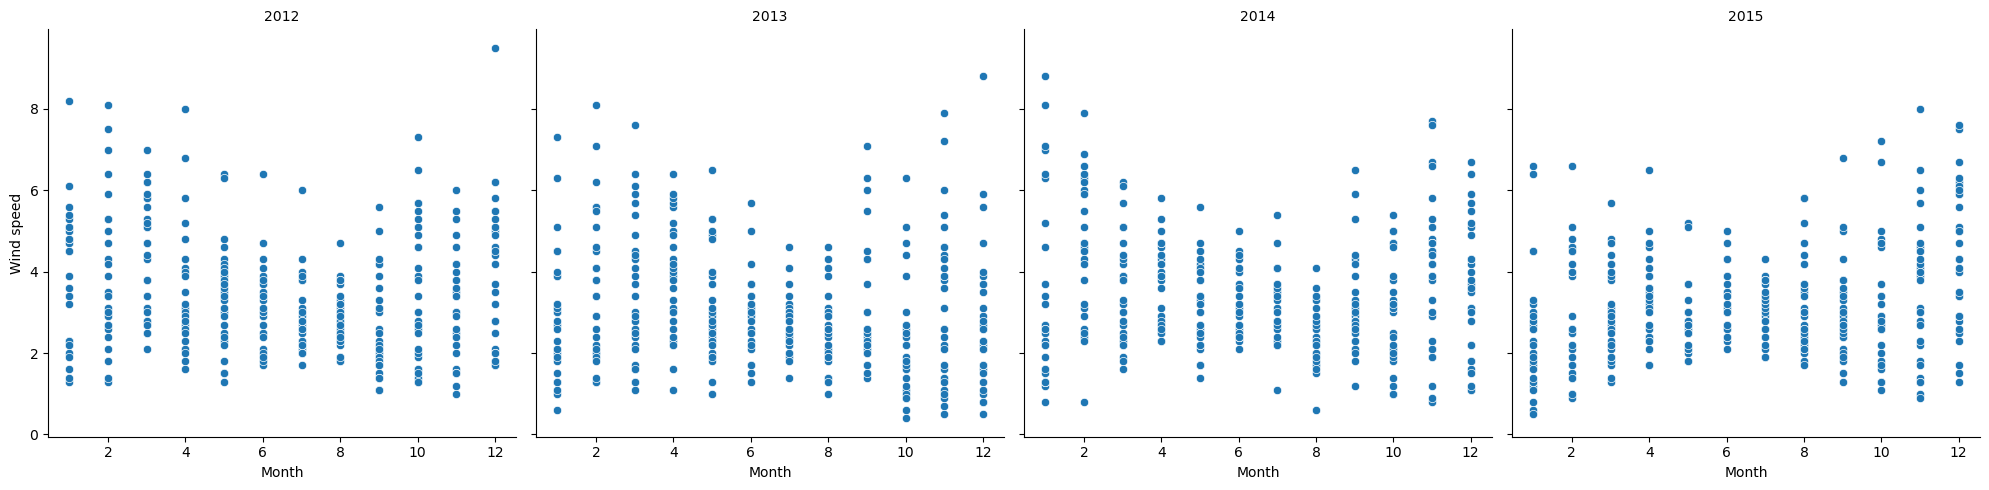

In [18]:
g = sns.FacetGrid(df, col='year', col_wrap=4, height=5)
g.map(sns.scatterplot, 'month', 'wind')
g.set_axis_labels('Month', 'Wind speed')
g.set_titles(col_template="{col_name}")
plt.show()

In [19]:
# Weather type distribution
df.weather.value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

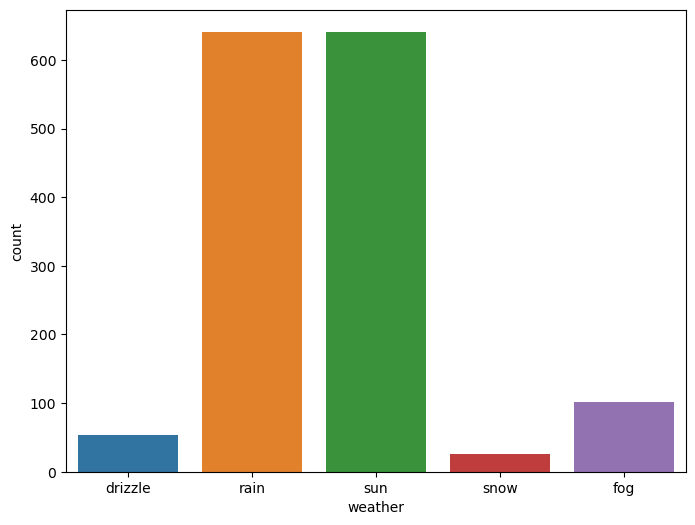

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='weather')
plt.show()

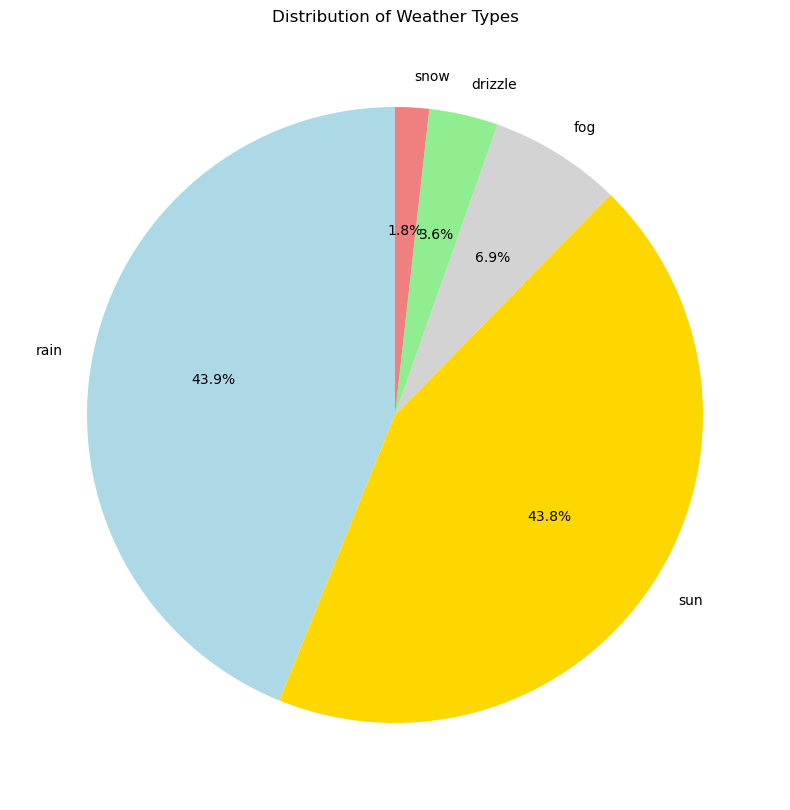

In [21]:
x = df.weather.value_counts()
plt.figure(figsize=(12, 10))
plt.pie(x, labels=x.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'gold', 'lightgray', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Weather Types')
plt.show()

In [22]:
# Drop unnecessary columns
df.drop(['month', 'year'], axis=1, inplace=True)

In [23]:
# Encode the weather column
le = LabelEncoder()
df['weather'] = le.fit_transform(df['weather'])

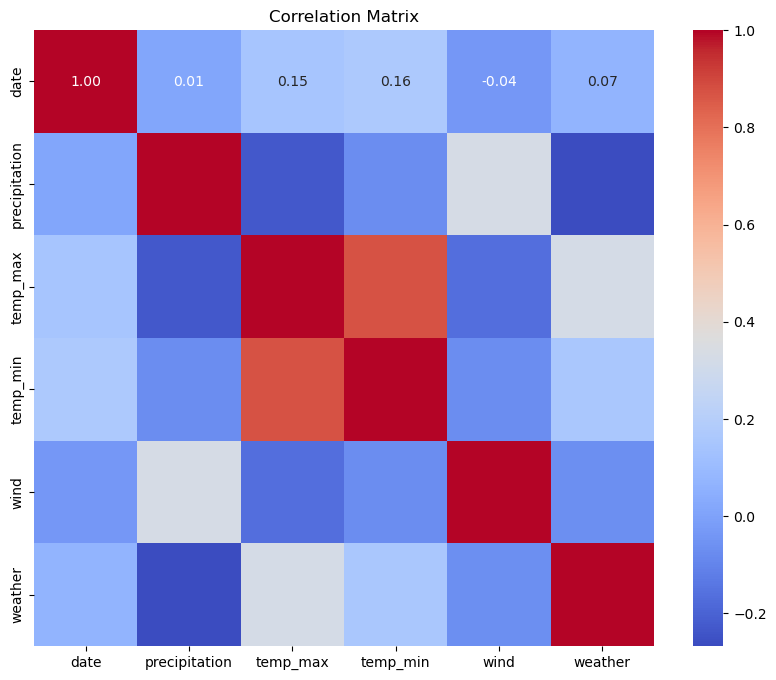

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [24]:
correlation_matrix = df.corr()
print(correlation_matrix)

                   date  precipitation  temp_max  temp_min      wind   weather
date           1.000000       0.014292  0.145827  0.164249 -0.039163  0.067043
precipitation  0.014292       1.000000 -0.228555 -0.072684  0.328045 -0.267388
temp_max       0.145827      -0.228555  1.000000  0.875687 -0.164857  0.322337
temp_min       0.164249      -0.072684  0.875687  1.000000 -0.074185  0.154981
wind          -0.039163       0.328045 -0.164857 -0.074185  1.000000 -0.065858
weather        0.067043      -0.267388  0.322337  0.154981 -0.065858  1.000000


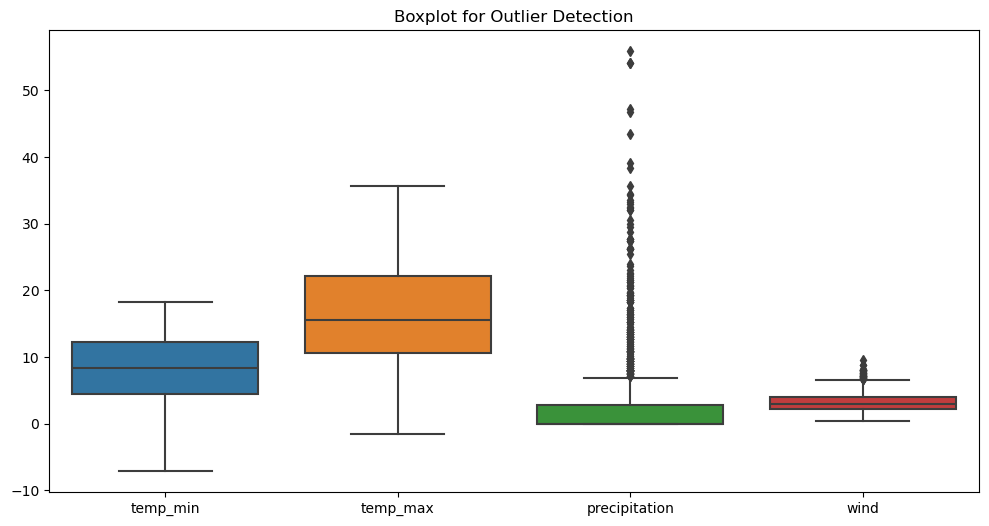

In [23]:
# Outlier detection using boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['temp_min', 'temp_max', 'precipitation', 'wind']])
plt.title('Boxplot for Outlier Detection')
plt.show()

In [24]:
# Define features and target
x = df[['temp_min', 'temp_max', 'precipitation', 'wind']]
y = df['weather']

In [25]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [26]:
# Model training and evaluation function
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, zero_division=1)
    return accuracy, conf_matrix, classification_rep


In [27]:
# Models
models = {
    'GaussianNB': GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}


In [28]:
# Evaluate models
results = {}
for name, model in models.items():
    accuracy, conf_matrix, classification_rep = train_and_evaluate(model, X_train, X_test, y_train, y_test)
    results[name] = {'accuracy': accuracy, 'conf_matrix': conf_matrix, 'classification_rep': classification_rep}


In [29]:
# Display results
for name, result in results.items():
    print(f"\nModel: {name}")
    print(f"Accuracy: {result['accuracy']:.2f}")
    print("Confusion Matrix:")
    print(result['conf_matrix'])
    print("Classification Report:")
    print(result['classification_rep'])


Model: GaussianNB
Accuracy: 0.83
Confusion Matrix:
[[  0   0   0   0   9]
 [  1   0   0   0  24]
 [  0   0 109   3   8]
 [  0   0   4   4   0]
 [  1   0   0   0 130]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       1.00      0.00      0.00        25
           2       0.96      0.91      0.94       120
           3       0.57      0.50      0.53         8
           4       0.76      0.99      0.86       131

    accuracy                           0.83       293
   macro avg       0.66      0.48      0.47       293
weighted avg       0.84      0.83      0.78       293


Model: DecisionTree
Accuracy: 0.73
Confusion Matrix:
[[  0   1   0   0   8]
 [  2   5   4   0  14]
 [  1   0 105   7   7]
 [  0   0   4   4   0]
 [ 11  16   4   0 100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1      

In [30]:
# Hypertune the best model
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = models[best_model_name]

if best_model_name == 'DecisionTree':
    param_grid = {'max_depth': [3, 5, 7, 10]}
elif best_model_name == 'RandomForest':
    param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 10]}
elif best_model_name == 'XGBoost':
    param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 10]}
else:
    param_grid = {}

if param_grid:
    grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

In [31]:
# Final evaluation of the best model 
final_accuracy, final_conf_matrix, final_classification_rep = train_and_evaluate(best_model, X_train, X_test, y_train, y_test)
print(f"\nBest Model after Hypertuning: {best_model_name}")
print(f"Final Accuracy: {final_accuracy:.2f}")
print("Final Confusion Matrix:")
print(final_conf_matrix)
print("Final Classification Report:")
print(final_classification_rep)


Best Model after Hypertuning: LogisticRegression
Final Accuracy: 0.83
Final Confusion Matrix:
[[  0   0   0   0   9]
 [  0   0   0   0  25]
 [  0   0 112   0   8]
 [  0   0   7   1   0]
 [  0   0   0   0 131]]
Final Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         9
           1       1.00      0.00      0.00        25
           2       0.94      0.93      0.94       120
           3       1.00      0.12      0.22         8
           4       0.76      1.00      0.86       131

    accuracy                           0.83       293
   macro avg       0.94      0.41      0.40       293
weighted avg       0.87      0.83      0.78       293



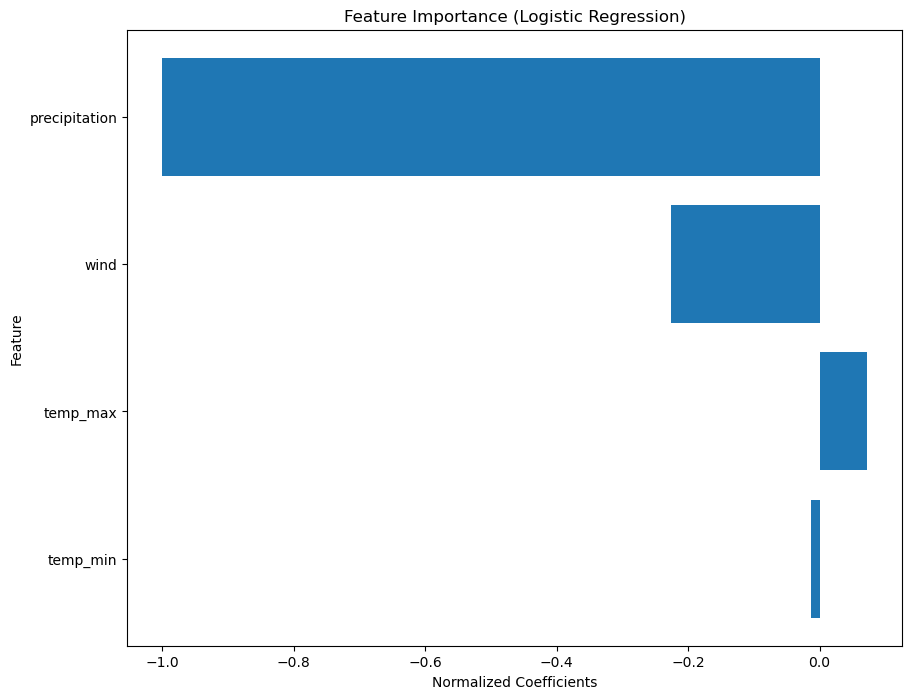

In [32]:
# Get feature coefficients
feature_names = X_train.columns  # Assuming you have feature names
coefficients = best_model.coef_[0]

# Normalize coefficients
coefficients /= np.abs(coefficients).max()

# Sort indices based on absolute coefficient values
sorted_indices = np.argsort(np.abs(coefficients))

# Plot
plt.figure(figsize=(10, 8))
plt.barh(range(len(coefficients)), coefficients[sorted_indices], align='center')
plt.yticks(range(len(coefficients)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Normalized Coefficients')
plt.ylabel('Feature')
plt.title('Feature Importance (Logistic Regression)')
plt.show()


### Prediction 

In [57]:
#prediction = best_model.predict([[10.9, 10.6, 2.8, 4.5]])

# Make a prediction on new data
new_data = pd.DataFrame([[10.9, 10.6, 2.8, 4.5]], 
                        columns=['temp_min', 'temp_max', 'precipitation', 'wind'])
prediction = best_model.predict(new_data)
print(f"Prediction for new data: {prediction}")

Prediction for new data: [2]


In [58]:
# printing the statements over predicted values
if prediction == 0:
    print("The weather is likely to be drizzle.")
elif prediction == 1:
    print("The weather is likely to be foggy.")
elif prediction == 2:
    print("The weather is likely to be rainy.")
elif prediction == 3:
    print("The weather is likely to be snow.")
else :
    print("The weather is likely to be sunny.")

The weather is likely to be rainy.


In [47]:
# Getting the mapping of the original to encoded values
mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Saving the encoded and original values for comparision in new dataframe named mapping_df
mapping_df = pd.DataFrame(list(mapping.items()), columns=['Original', 'Encoded'])

In [48]:
mapping_df

,Original,Encoded
0,drizzle,0
1,fog,1
2,rain,2
3,snow,3
4,sun,4


In [50]:
df.head(5)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2


In [59]:
# Predict on the test data
y_pred = best_model.predict(X_test)

In [60]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 1.1800387568113142
